In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils
import model_spectra as NN
import fitting

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

# Check label recovery 

Best Fit Labels:
[0.00 -1.53 -1.50 -1.50 -1.51 -1.52 -1.52 -1.52 4093.61 0.47 9.90]
True Labels:
[0.00 -1.50 -1.50 -1.50 -1.50 -1.50 -1.50 -1.50 4100.00 0.50 10.00]


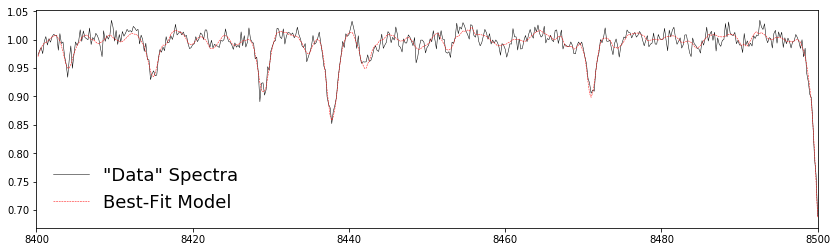

In [2]:
# read in the standard wavelength grid onto which we interpolate spectra.
wavelength = utils.load_wavelength_array()

# read in all individual neural networks we'll need. 
NN_coeffs = utils.read_in_neural_network(name='norm_spectra_approx')

# Generate a spectrum from labels and NN
feh = -1.5
alphafe = 0.0
alpha = alphafe + feh
Teff = 4100
logg = 0.5
dv = 10
real_labels = np.array([alphafe, alpha, alpha, alpha, alpha, alpha, alpha,
                        feh, Teff, logg, dv])
real_spec = NN.get_spectrum_from_neural_net(labels=real_labels, NN_coeffs=NN_coeffs)
data_spec = real_spec + 0.01 * np.random.randn(len(real_spec))
spec_err = 0.01 * np.ones(len(wavelength))

# Apply Mask
kirby_2008 = utils.get_spectral_mask_dict(name='kirby_2008')
mask = utils.generate_mask_from_dict(**kirby_2008)
spec_err[mask] = 999.

# Fit spectrum
popt, pcov, model_spec \
    = fitting.fit_normalized_spectrum_single_star_model(norm_spec = data_spec,
                                                        spec_err = spec_err,
                                                        NN_coeffs = NN_coeffs,
                                                        p0 = None, num_p0 = 1)

# zoom in on a small region of the spectrum so we can see what's going on.
lambda_min, lambda_max = 8400, 8500# for plotting 
plt.figure(figsize=(14, 4))
m = (wavelength < lambda_max) & (wavelength > lambda_min)
plt.plot(wavelength[m], data_spec[m], 'k', lw=0.5, label = '"Data" Spectra')
plt.plot(wavelength[m], model_spec[m], 'r--', lw=0.5, label = 'Best-Fit Model')
plt.xlim(lambda_min, lambda_max)
plt.legend(loc = 'best', frameon = False, fontsize = 18)

print('Best Fit Labels:')
print(popt)

print('True Labels:')
print(real_labels)

# Fitting Spectra from the Training Set

In [3]:
D_PayneDir = '/Users/Nathan/Documents/Berkeley/Chemical_Evolution/DEIMOS/D-Payne/'
SpectraDir = D_PayneDir + 'spectra/synth_spectra/'
SpectraFile = 'convolved_synthetic_spectra_MIST.npz'
temp = np.load(SpectraDir + SpectraFile)
spectra = temp['spectra']
norm_spectra = temp['norm_spectra_approx']
labels = temp['labels']
temp.close()



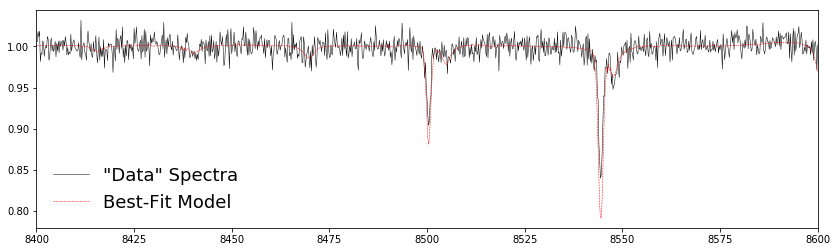

Best Fit Labels:
[0.16 -2.83 -2.77 -2.82 -2.84 -2.83 -2.81 -2.95 5523.08 2.88 0.68]
True Labels:
[-0.40 -3.40 -3.40 -3.40 -3.40 -3.40 -3.40 -3.00 5475.74 2.68 0.00]


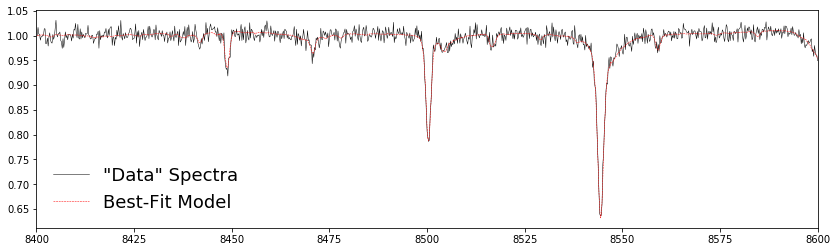

Best Fit Labels:
[-0.34 -0.91 -0.94 -0.84 -0.85 -0.91 -0.85 -0.53 6907.80 4.41 0.32]
True Labels:
[-0.40 -0.90 -0.90 -0.90 -0.90 -0.90 -0.90 -0.50 6954.97 4.45 0.00]


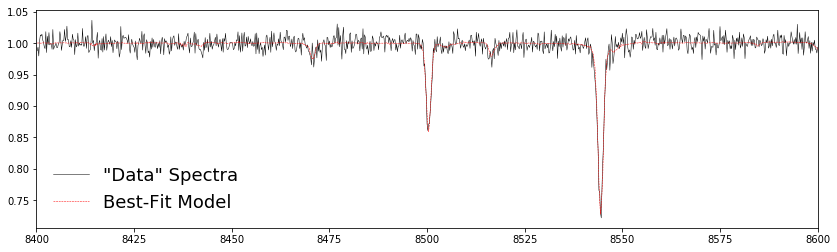

Best Fit Labels:
[-0.55 -2.51 -2.55 -2.54 -2.56 -2.54 -2.52 -1.94 5438.17 3.87 0.51]
True Labels:
[-0.60 -2.60 -2.60 -2.60 -2.60 -2.60 -2.60 -2.00 5415.22 3.80 0.00]


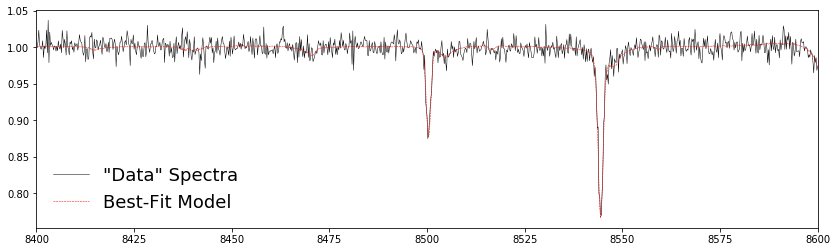

Best Fit Labels:
[-0.04 -2.10 -2.12 -2.14 -2.14 -2.15 -2.13 -2.08 6290.09 4.23 0.33]
True Labels:
[-0.20 -2.20 -2.20 -2.20 -2.20 -2.20 -2.20 -2.00 6296.94 4.17 0.00]


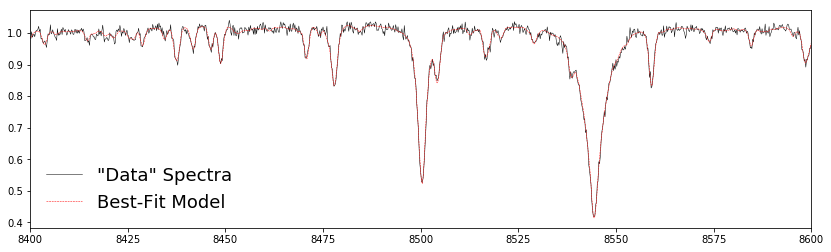

Best Fit Labels:
[0.40 0.64 0.65 0.64 0.69 0.63 0.61 0.25 6229.04 4.66 0.06]
True Labels:
[0.40 0.65 0.65 0.65 0.65 0.65 0.65 0.25 6264.25 4.66 0.00]


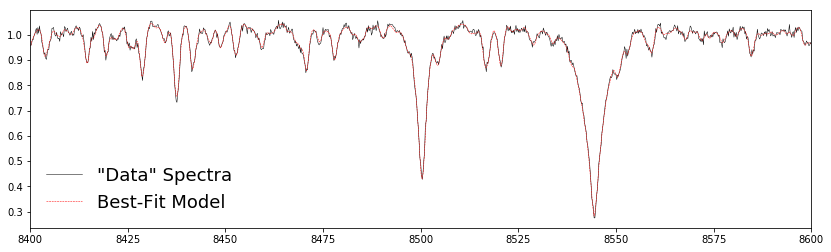

Best Fit Labels:
[0.59 0.61 0.59 0.63 0.58 0.55 0.61 0.01 4395.71 2.35 0.15]
True Labels:
[0.60 0.60 0.60 0.60 0.60 0.60 0.60 0.00 4407.03 2.35 0.00]


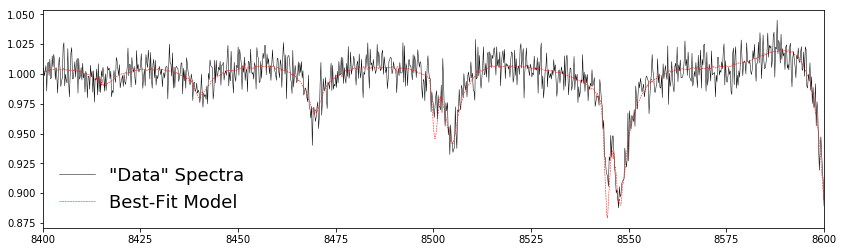

Best Fit Labels:
[-0.04 -3.36 -3.25 -3.37 -3.41 -3.39 -3.36 -3.29 7035.47 3.68 0.28]
True Labels:
[-0.00 -4.00 -4.00 -4.00 -4.00 -4.00 -4.00 -4.00 7031.11 3.67 0.00]


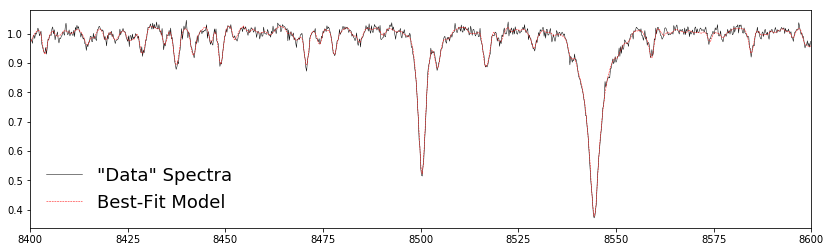

Best Fit Labels:
[-0.20 0.02 0.05 0.04 0.02 0.07 0.06 0.26 5427.56 3.12 0.06]
True Labels:
[-0.20 0.05 0.05 0.05 0.05 0.05 0.05 0.25 5435.55 3.05 0.00]


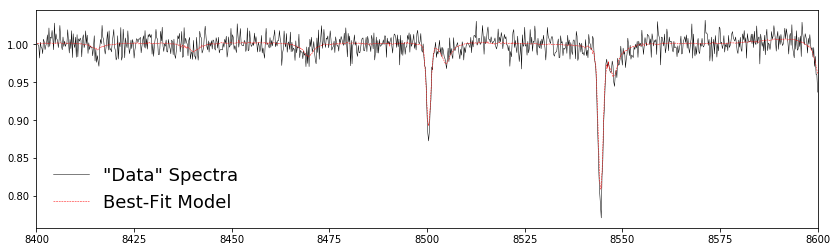

Best Fit Labels:
[0.18 -2.73 -2.77 -2.77 -2.81 -2.80 -2.79 -2.92 5778.58 3.14 0.18]
True Labels:
[0.40 -2.60 -2.60 -2.60 -2.60 -2.60 -2.60 -3.00 5784.26 3.15 0.00]


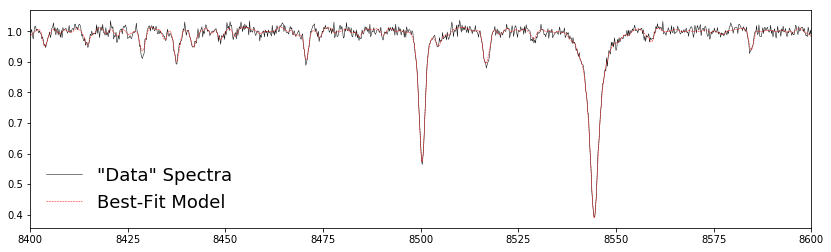

Best Fit Labels:
[-0.20 -1.28 -1.24 -1.24 -1.28 -1.24 -1.25 -1.03 4520.37 1.26 0.05]
True Labels:
[-0.20 -1.20 -1.20 -1.20 -1.20 -1.20 -1.20 -1.00 4564.82 1.43 0.00]


In [4]:
# Samples 10 spectra randomly from the training set
n = np.random.randint(0,len(norm_spectra),10)

for i, spec in enumerate(norm_spectra[n]):
    j = n[i]
    real_labels = np.append(labels[j],0.0)
    real_spec = spec
    data_spec = real_spec + 0.01 * np.random.randn(len(real_spec))
    spec_err = 0.01 * np.ones(len(real_spec))
    
    # Apply Mask
    kirby_2008 = utils.get_spectral_mask_dict(name='kirby_2008')
    mask = utils.generate_mask_from_dict(**kirby_2008)
    spec_err[mask] = 999.
    
    # Restore NN
    NN_coeffs = utils.read_in_neural_network(name='norm_spectra_approx')

    # Fit spectrum
    popt, pcov, model_spec \
    = fitting.fit_normalized_spectrum_single_star_model(norm_spec = data_spec,
                                                        spec_err = spec_err,
                                                        NN_coeffs = NN_coeffs,
                                                        p0 = None, num_p0 = 1)

    # zoom in on a small region of the spectrum so we can see what's going on.
    lambda_min, lambda_max = 8400, 8600# for plotting 
    plt.figure(figsize=(14, 4))
    m = (wavelength < lambda_max) & (wavelength > lambda_min)
    plt.plot(wavelength[m], data_spec[m], 'k', lw=0.5, label = '"Data" Spectra')
    plt.plot(wavelength[m], model_spec[m], 'r--', lw=0.5, label = 'Best-Fit Model')
    plt.xlim(lambda_min, lambda_max)
    plt.legend(loc = 'best', frameon = False, fontsize = 18)
    plt.show()
    
    print('Best Fit Labels:')
    print(popt)
    
    print('True Labels:')
    print(real_labels)

# Fitting Real Spectra

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np
from astropy.io import fits
import multiprocessing
import utils

'''
Code for reading in 1-d DEIMOS spectra reduced by the spec2d code:
http://deep.ps.uci.edu/spec2d/.

This code:
1) Reads in 1-d DEIMOS spectra .fits files and concatenates spectra from the
red and blue CCDs.
2) Interpolates spectra onto the standard wavelength template for DEIMOS.
3) Outputs all object spectra in a .npz file.
'''

# # # Settings # # #

'''
Which method of fitting the DEIMOS spectrum do you want to use:
'Horne' or 'Bxspf'
'''
method = 'Horne'

# Directory reduced DEIMOS spectra reside in
DEIMOSDir = '/Users/Nathan/Documents/Berkeley/Chemical_Evolution/DEIMOS/'
InputDir = DEIMOSDir + 'U112/m15msk/'
# Input List of DEIMOS spectra to be processed for fitting
InputList = InputDir + 'spec1d.m15msk.txt'
# D-Payne Directory
D_PayneDir = DEIMOSDir + 'D-Payne/'
# Output directory for processed spectra
OutputDir = D_PayneDir + 'spectra/M15/'
# File containing processed spectra
OutputFile = 'm15_'+method+'.npz'

# Extract object names from input list
print('Restoring list of objects...')
temp = open(InputList, 'r')
ObjList = temp.read().split('\n')[:-2]
temp.close

ObjList = ObjList[:2]

# Restore Wavelength Template
print('Restoring Wavelength Template...')
wavelength_template = utils.load_wavelength_array()
# Calculate matrix of distances between wavelengths
print('Calculating matrix of distances between wavelengths...')
wavelength_diff_matrix \
    = wavelength_template[:, np.newaxis] - wavelength_template
# Restore DEIMOS continuum pixels
print('Restoring DEIMOS continuum pixels...')
cont_reg = utils.load_deimos_cont_pixels()
# Restore spectral mask from Kirby+ 2008
print('Restoring spectral mask from Kirby+ 2008...')
kirby_2008 = utils.get_spectral_mask_dict(name='kirby_2008')
mask = utils.generate_mask_from_dict(**kirby_2008)


def get_deimos_spectra(Obj, method, InputDir=None):
    '''
    Read in and concatenate red and blue spectra
    '''
    ObjHDUL = fits.open(InputDir + Obj)

    waveB = ObjHDUL[method+'-B'].data['LAMBDA'][0]
    waveR = ObjHDUL[method+'-R'].data['LAMBDA'][0]
    wave = np.concatenate((waveB, waveR))

    specB = ObjHDUL[method+'-B'].data['SPEC'][0]
    specR = ObjHDUL[method+'-R'].data['SPEC'][0]
    spec = np.concatenate((specB, specR))

    ivarB = ObjHDUL[method+'-B'].data['IVAR'][0]
    ivarR = ObjHDUL[method+'-R'].data['IVAR'][0]
    ivar = np.concatenate((ivarB, ivarR))
    ivar[ivar == 0] = 1e-16  # Avoid np.inf in spec_err

    RA = ObjHDUL[method+'-B'].header['RA_OBJ']
    Dec = ObjHDUL[method+'-B'].header['DEC_OBJ']
    return (wave, spec, ivar, RA, Dec)


def interpolate_deimos_spectra(wave, spec, spec_err):
    '''
    Interpolates a DEIMOS spectrum onto the default wavelength grid
    '''
    if len(wave) != 16250:
        spec = np.interp(wavelength_template, wave, spec)
        spec_err = np.interp(wavelength_template, wave, spec_err)
        wave = np.copy(wavelength_template)
    return(wave, spec, spec_err)

def process_deimos_spectra(i):
    '''
    Processes all spectra in InputList
    '''
    Obj = ObjList[i]
    ObjNumber = Obj[14:-5]
    print('Processing spectra for object: %s' % Obj)
    print('Restoring spectra #%s' % ObjNumber)
    wave_temp, spec_temp, ivar_temp, RA, Dec = \
        get_deimos_spectra(Obj=Obj, method=method, InputDir=InputDir)
    print('Interpolating spectra #%s' % ObjNumber)
    wavelength, spec, spec_err = \
        interpolate_deimos_spectra(wave=wave_temp,
                                   spec=spec_temp,
                                   spec_err=(ivar_temp**-1))
    print('Applying spectral mask for spectra #%s' % ObjNumber)
    spec_err[mask] = 999.
    print('Normalizing spectra #%s' % ObjNumber)
    cont_spec = \
        utils.get_deimos_continuum(spec, spec_err=spec_err,
                                   wavelength=wavelength,
                                   cont_pixels=cont_reg,
                                   wavelength_diff_matrix=wavelength_diff_matrix)
    spec = spec / cont_spec
    return(ObjNumber, wavelength, spec, ivar, RA, Dec)


print('Beginning processing of all spectra')
pool = multiprocessing.Pool(multiprocessing.cpu_count())
ObjNumber, wavelength, spec, ivar, RA, Dec \
    = pool.map(process_deimos_spectra, range(len(ObjList)))
print('Completed processing of all spectra')

# Save processed spectra
#print('Saving all processed spectra to %s' % OutputFile)
#np.savez(OutputDir + OutputFile, obj=ObjNumber, wavelength=wavelength,
#         spec=spec, spec_err=(ivar**-1), RA=RA, Dec=Dec)
#

Restoring list of objects...
Restoring Wavelength Template...
Calculating matrix of distances between wavelengths...
Restoring DEIMOS continuum pixels...
Restoring spectral mask from Kirby+ 2008...
Beginning processing of all spectra
Processing spectra for object: spec1d.m15msk.001.0000014.fits
Restoring spectra #001.0000014
Processing spectra for object: spec1d.m15msk.000.0000006.fits
Restoring spectra #000.0000006
Interpolating spectra #000.0000006
Interpolating spectra #001.0000014
Applying spectral mask for spectra #000.0000006
Normalizing spectra #000.0000006
Applying spectral mask for spectra #001.0000014
Calculating weights...
Normalizing spectra #001.0000014
Calculating weights...
